In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignoring warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"Medical Appointments No-Show/medical-appointments-no-show-en.csv")

## Checking the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49593 entries, 0 to 49592
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   specialty                42139 non-null  object 
 1   appointment_time         49593 non-null  object 
 2   gender                   49593 non-null  object 
 3   appointment_date         49593 non-null  object 
 4   no_show                  49593 non-null  object 
 5   no_show_reason           1737 non-null   object 
 6   disability               44456 non-null  object 
 7   date_of_birth            39272 non-null  object 
 8   entry_service_date       44438 non-null  object 
 9   city                     44412 non-null  object 
 10  icd                      10717 non-null  object 
 11  appointment_month        49593 non-null  object 
 12  appointment_year         49593 non-null  int64  
 13  appointment_shift        49593 non-null  object 
 14  age                   

In [5]:
df.shape

(49593, 26)

In [6]:
df.head()

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09/09/2021,yes,surto,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09/09/2021,no,NaN,motor,10/10/1954,5/2/2020,B. CAMBORIU,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild


# Data Cleaning

## Checking for null values

In [7]:
df.isna().sum()

specialty                   7454
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             47856
disability                  5137
date_of_birth              10321
entry_service_date          5155
city                        5181
icd                        38876
appointment_month              0
appointment_year               0
appointment_shift              0
age                        10350
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day            1016
average_rain_day            1016
max_temp_day                1016
max_rain_day                1016
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64

## Checking for duplicates

In [8]:
print('Duplicate rows:',df.duplicated().sum())

Duplicate rows: 2921


## Summary Statistics

In [9]:
print("Numerical Summary:\n")
df.describe()

Numerical Summary:



,appointment_year,age,under_12_years_old,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before
count,49593.000000,39243.000000,49593.000000,49593.000000,49593.000000,48577.000000,48577.000000,48577.000000,48577.000000,49593.000000,49593.000000
mean,2018.255076,18.522361,0.472446,0.071784,0.544230,19.748317,0.190119,23.961984,1.895687,0.981005,0.981005
std,1.736964,19.234999,0.499245,0.258133,0.498045,3.428767,0.452214,3.819804,4.445412,0.136507,0.136507
min,2016.000000,2.000000,0.000000,0.000000,0.000000,8.940000,0.000000,13.300000,0.000000,0.000000,0.000000
25%,2017.000000,8.000000,0.000000,0.000000,0.000000,17.480000,0.000000,21.400000,0.000000,1.000000,1.000000
50%,2018.000000,11.000000,0.000000,0.000000,1.000000,20.060000,0.010000,23.900000,0.200000,1.000000,1.000000
75%,2019.000000,15.000000,1.000000,0.000000,1.000000,22.120000,0.150000,26.500000,1.600000,1.000000,1.000000
max,2022.000000,110.000000,1.000000,1.000000,1.000000,28.010000,4.770000,35.400000,45.000000,1.000000,1.000000


In [10]:
print(" Categorical Summary:\n")
df.describe(include='object')

 Categorical Summary:



,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,icd,appointment_month,appointment_shift,rain_intensity,heat_intensity
count,42139,49593,49593,49593,49593,1737,44456,39272,44438,44412,10717,49593,49593,49593,49593
unique,8,74,3,1001,2,341,3,954,333,13,63,12,2,4,5
top,speech therapy,14:40,M,17/04/2017,no,doente,intellectual,21/3/2017,6/3/2017,ITAJAÍ,F84,oct,afternoon,no_rain,mild
freq,11877,4130,37583,267,44761,197,30882,215,960,20515,3475,6282,27865,35362,23413


## Standardize column names

In [11]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('-', '_')
    .str.replace(' ', '_')
)

## Remove Duplicates

In [12]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Duplicate rows: 2921


## Handle Missing Values

In [13]:
print("Missing values before cleaning:")
print(df.isna().sum())

Missing values before cleaning:
specialty                   5948
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             44975
disability                  3818
date_of_birth               8678
entry_service_date          3836
city                        3862
icd                        36455
appointment_month              0
appointment_year               0
appointment_shift              0
age                         8704
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day             707
average_rain_day             707
max_temp_day                 707
max_rain_day                 707
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64
specialty                   5948
appointment_time               0
gender                         

In [14]:
df.replace(['NA', 'NaN', 'None', 'nan', ' '], np.nan, inplace=True)

## Standardize 'no_show' column

In [15]:
if 'no_show' in df.columns:
    df['no_show'] = df['no_show'].str.strip().str.lower()
    df['no_show'] = df['no_show'].replace({'no': 0, 'yes': 1})
    df['no_show'] = df['no_show'].astype('category')

## Cleaning categorical columns

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower().str.replace('-', '_')

In [17]:
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
specialty                   5948
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             44975
disability                  3827
date_of_birth               8691
entry_service_date          3836
city                        3862
icd                        36455
appointment_month              0
appointment_year               0
appointment_shift              0
age                         8704
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day             707
average_rain_day             707
max_temp_day                 707
max_rain_day                 707
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64


In [18]:
df.reset_index(drop=True, inplace=True)

## Removing columns with too many missing values

In [19]:
missing_percent = df.isna().mean() * 100
high_missing_cols = missing_percent[missing_percent > 50].index
print(f"Dropping columns with >50% missing: {list(high_missing_cols)}")
df.drop(columns=high_missing_cols, inplace=True)

Dropping columns with >50% missing: ['no_show_reason', 'icd']


## Converting object type to category type

In [20]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

## Normalizing missing values in cat_cols

In [21]:
for col in cat_cols:
    df[col] = df[col].astype(str).fillna('unknown')
    df[col] = df[col].replace(['nan', 'none', 'na', 'null', ''], 'unknown')

## Imputing missing values in numerical cols

In [22]:
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [23]:
print(df.isna().sum())

specialty                  0
appointment_time           0
gender                     0
appointment_date           0
no_show                    0
disability                 0
date_of_birth              0
entry_service_date         0
city                       0
appointment_month          0
appointment_year           0
appointment_shift          0
age                        0
under_12_years_old         0
over_60_years_old          0
patient_needs_companion    0
average_temp_day           0
average_rain_day           0
max_temp_day               0
max_rain_day               0
rainy_day_before           0
storm_day_before           0
rain_intensity             0
heat_intensity             0
dtype: int64


In [24]:
df.shape

(46672, 24)

# EDA

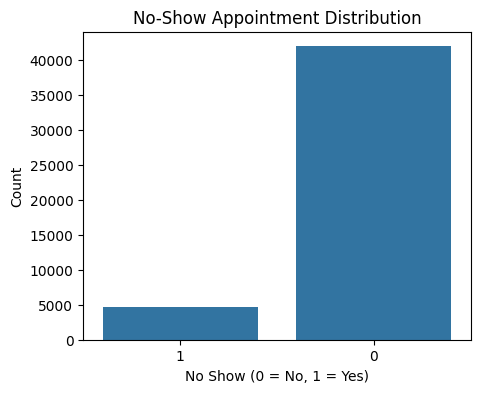

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x='no_show', data=df)
plt.title("No-Show Appointment Distribution")
plt.xlabel("No Show (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## Numerical values bar plot

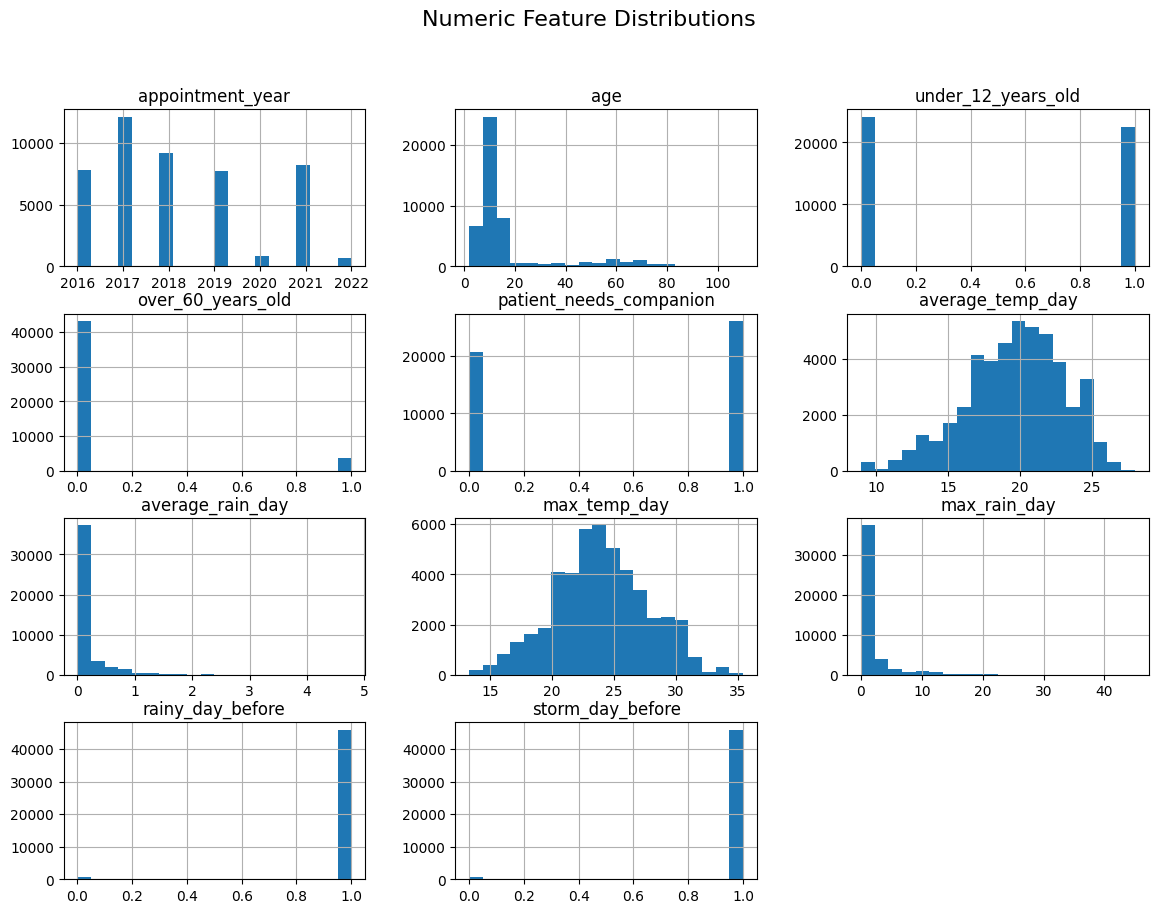

In [26]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

## Correlation heatmap

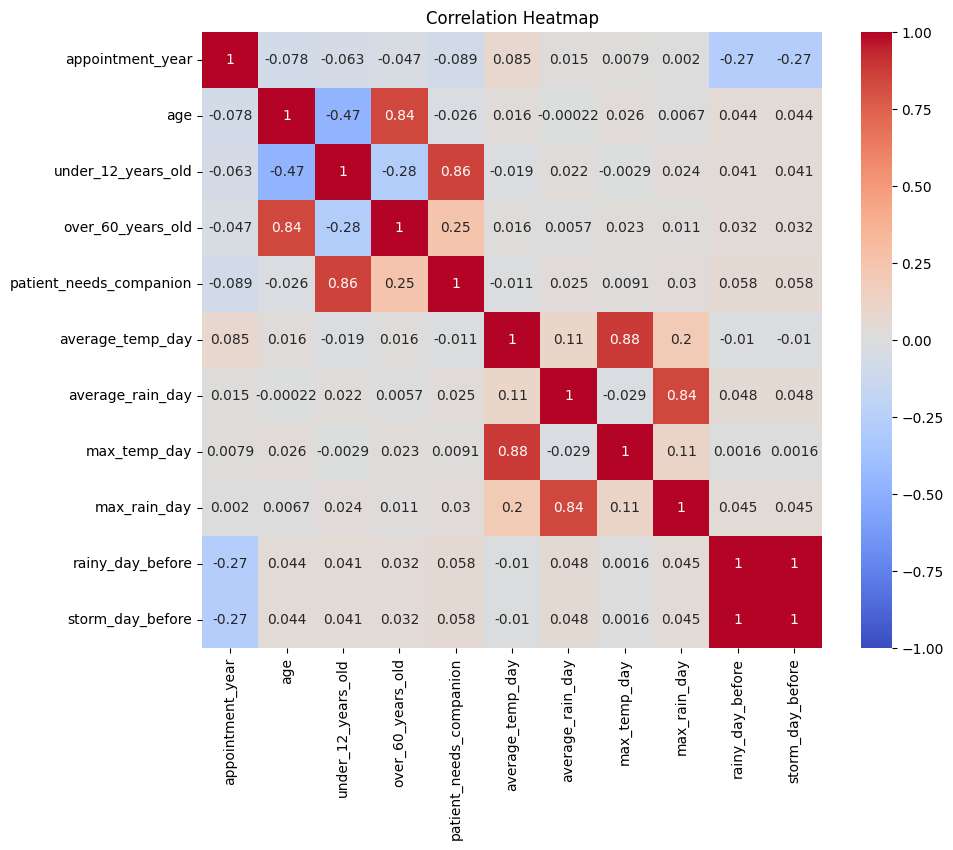

In [27]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm',vmin=-1)
plt.title("Correlation Heatmap")
plt.show()

## Categorical vs No show plots

In [28]:
invalid_genders = ['i']  
df = df[~df['gender'].isin(invalid_genders)].reset_index(drop=True)

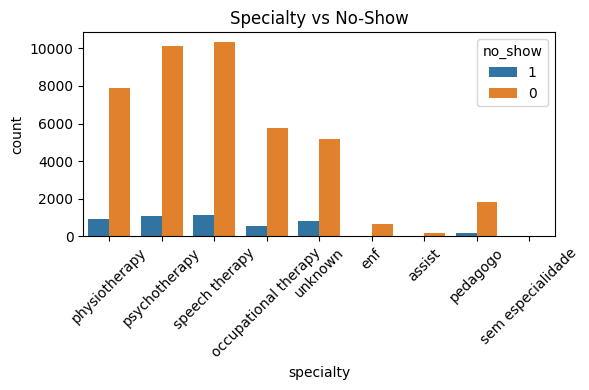

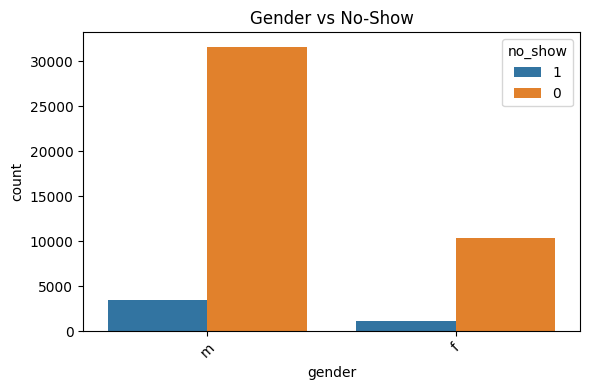

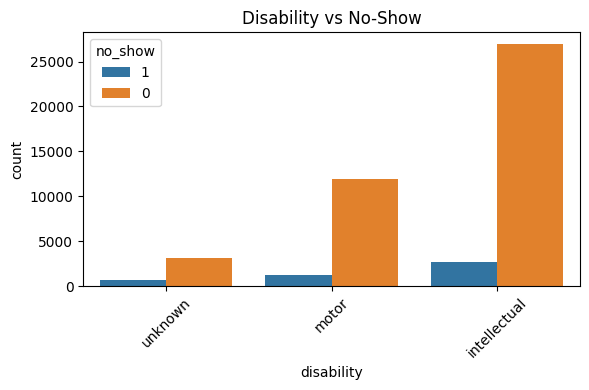

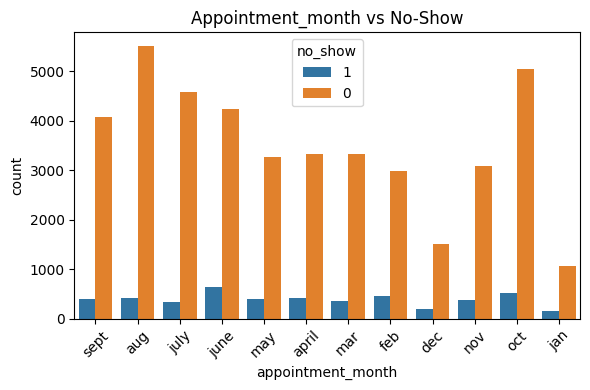

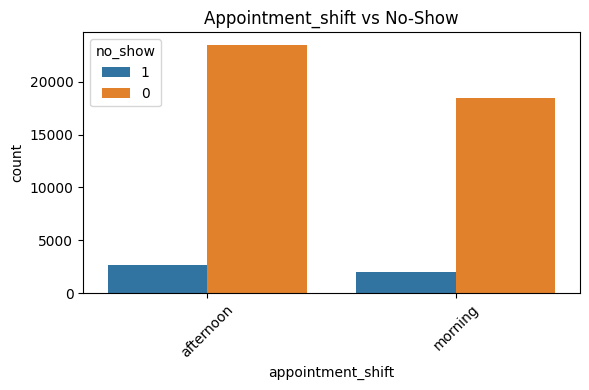

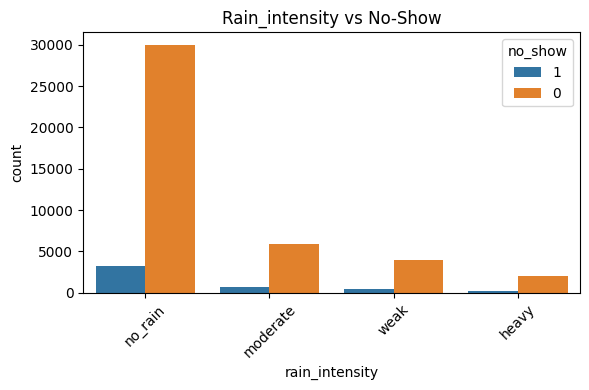

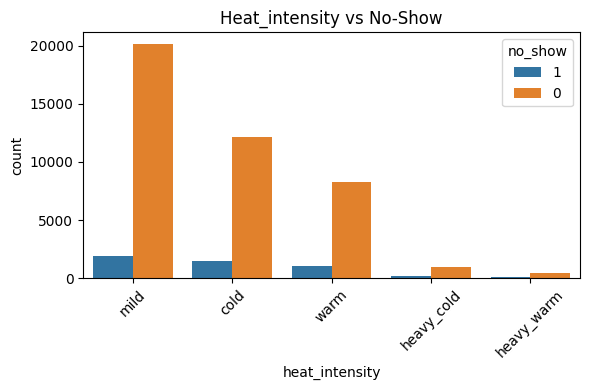

In [29]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    if col != 'no_show' and df[col].nunique() <= 12:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue='no_show')
        plt.title(f"{col.capitalize()} vs No-Show")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

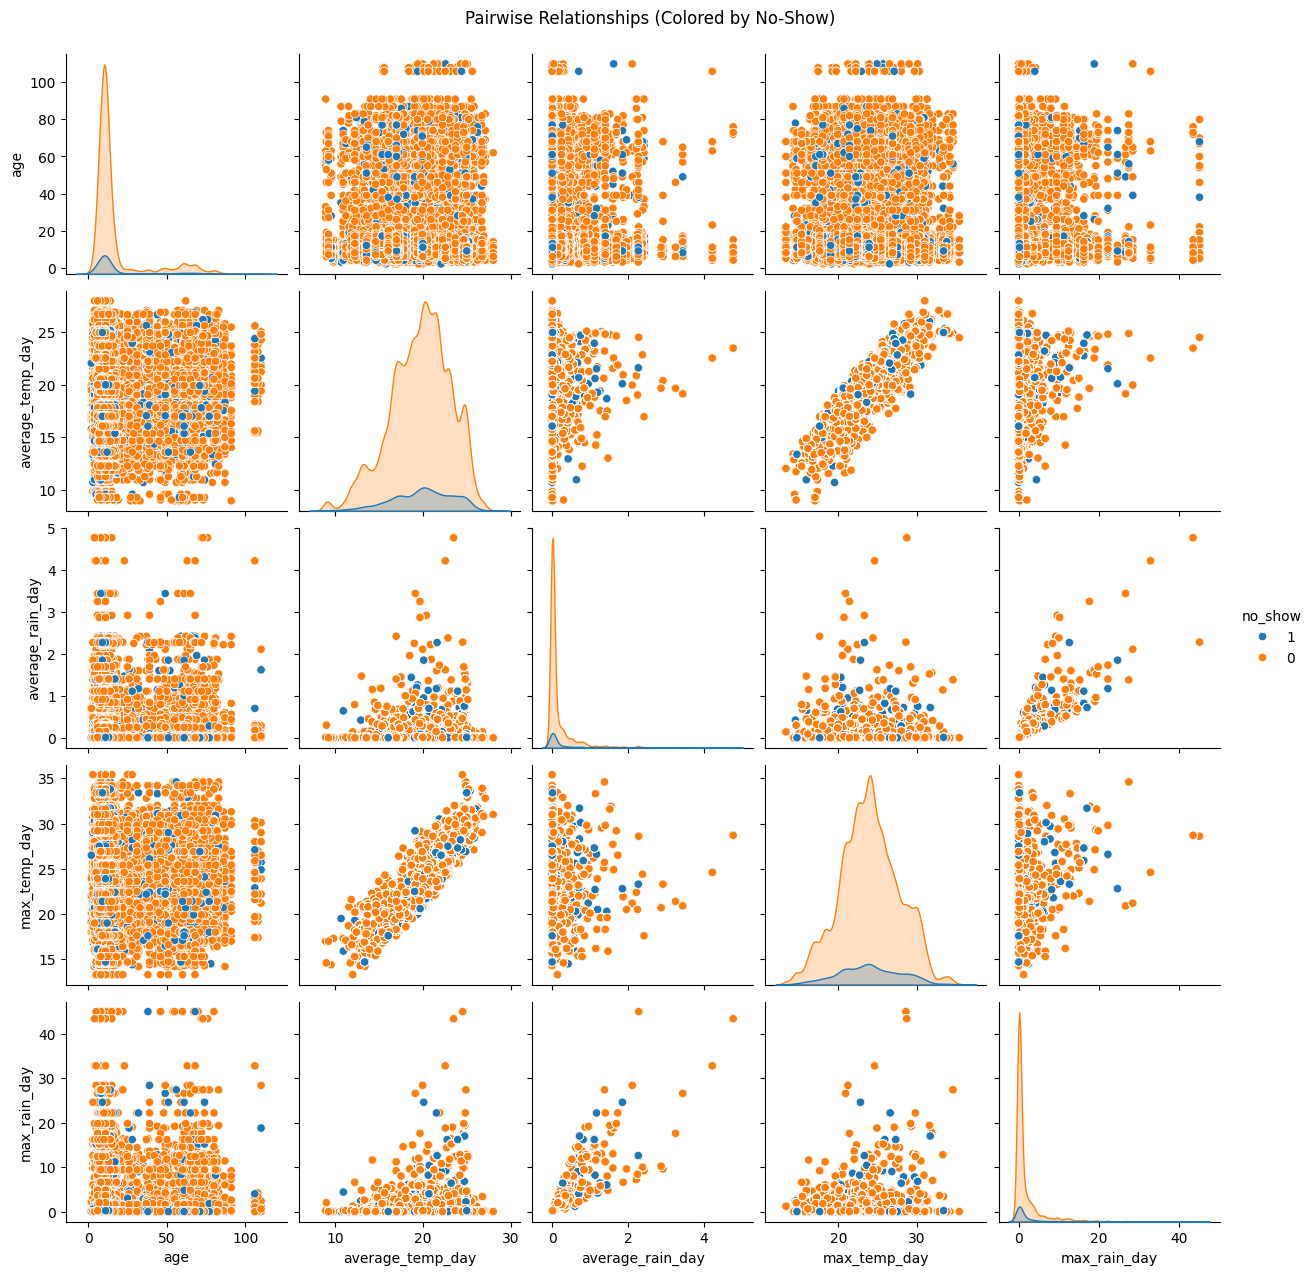

In [30]:
important_cols = [
    'age', 'average_temp_day', 'average_rain_day',
    'max_temp_day', 'max_rain_day', 'rain_intensity',
    'heat_intensity', 'no_show'
]
important_cols = [c for c in important_cols if c in df.columns]

if len(important_cols) > 2:
    sns.pairplot(df[important_cols], hue='no_show', diag_kind='kde')
    plt.suptitle("Pairwise Relationships (Colored by No-Show)", y=1.02)
    plt.show()

## Age plot

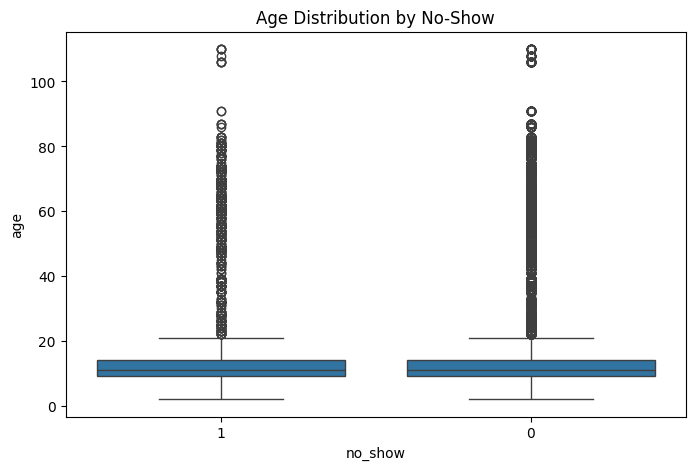

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='no_show', y='age', data=df)
plt.title("Age Distribution by No-Show")

plt.show()

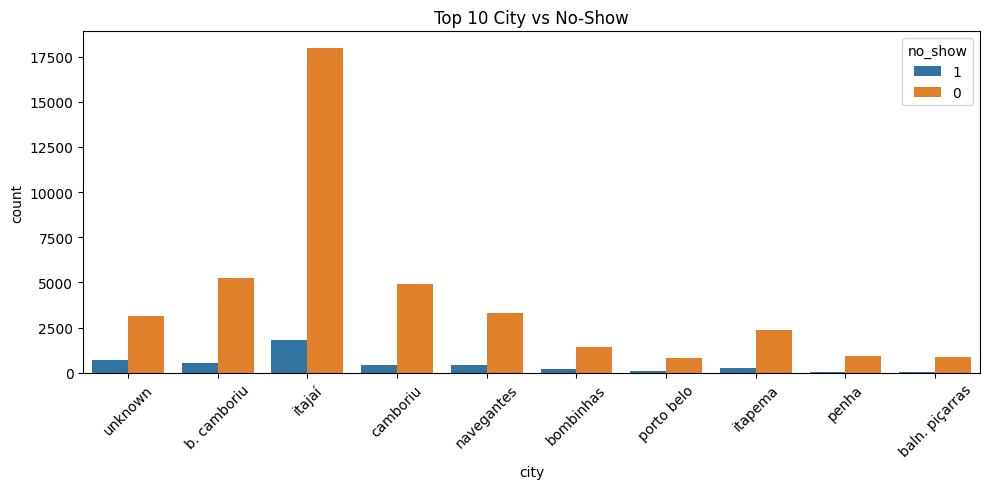

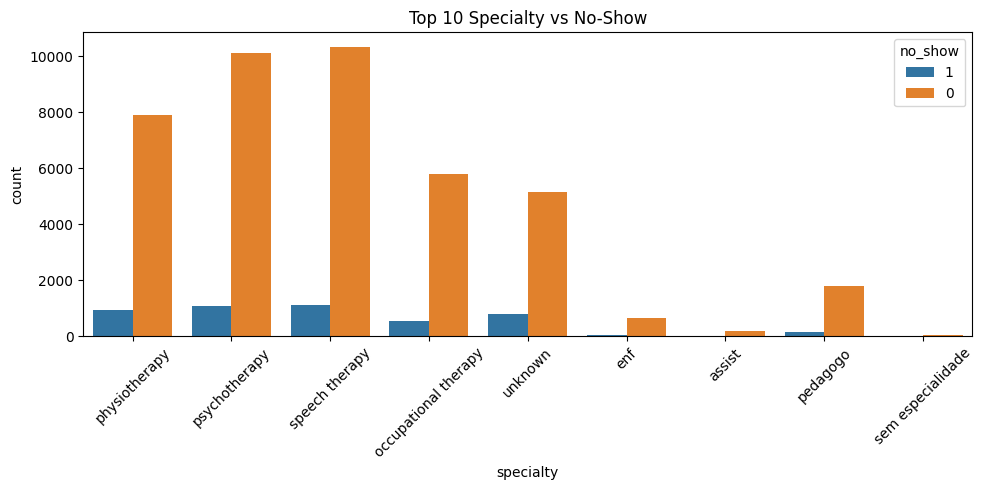

In [32]:
for col in ['city', 'specialty']:
    if col in df.columns:
        plt.figure(figsize=(10,5))
        top_values = df[col].value_counts().nlargest(10).index
        sns.countplot(data=df[df[col].isin(top_values)], x=col, hue='no_show')
        plt.title(f"Top 10 {col.capitalize()} vs No-Show")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Outliers

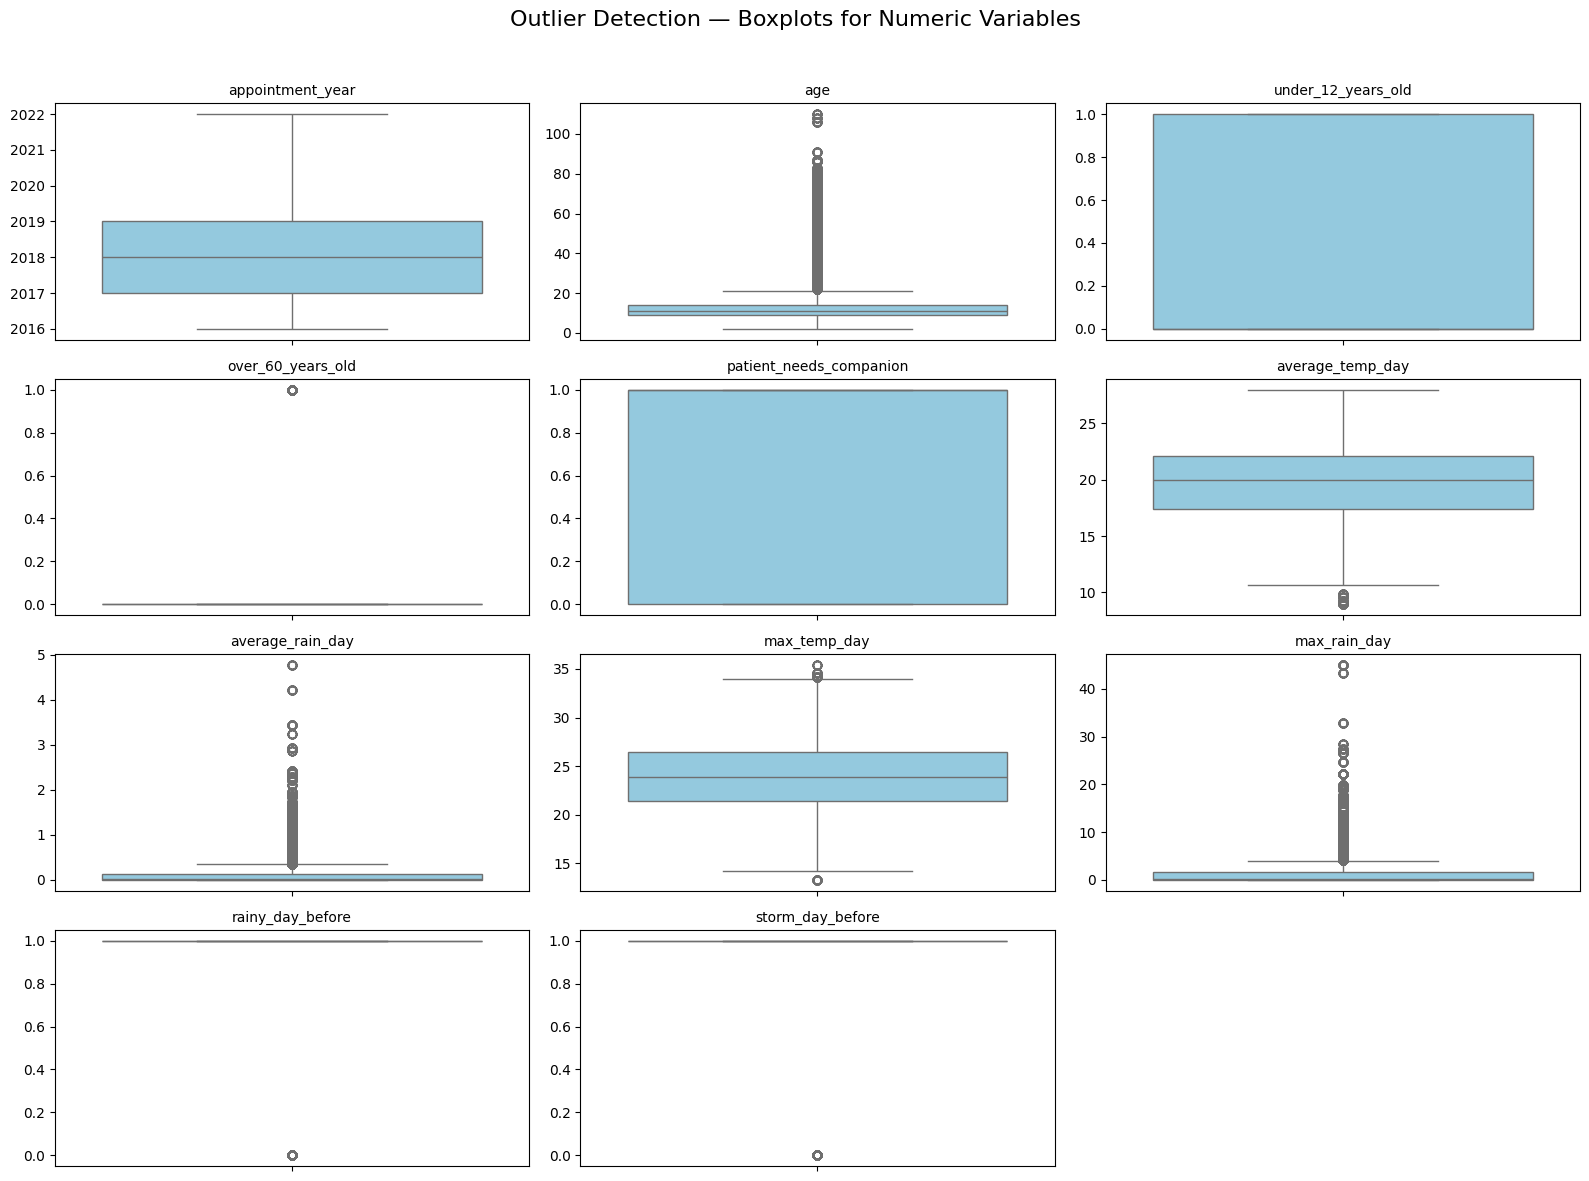

In [33]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(16, 12))
plt.suptitle("Outlier Detection — Boxplots for Numeric Variables", fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Data Preprocessing

In [35]:
target = 'no_show'
X = df.drop(columns=[target])
y = df[target].astype(int) 

In [36]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

In [37]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [38]:
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

## Train test split

In [39]:

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

train_idx_pre_resample = X_train.index.copy()
test_idx = X_test.index.copy()

orig_train_counter = Counter(y_train)
print("Train distribution before resampling:", orig_train_counter)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Train distribution after SMOTE:", Counter(y_train_res))

X_train, y_train = X_train_res, y_train_res

total = sum(orig_train_counter.values())
class_weights = [
    total / orig_train_counter.get(0, 1),
    total / orig_train_counter.get(1, 1)
]
print("Class weights for CatBoost (use when creating CatBoostClassifier):", class_weights)


Train distribution before resampling: Counter({0: 33590, 1: 3742})
Train distribution after SMOTE: Counter({0: 33590, 1: 33590})
Class weights for CatBoost (use when creating CatBoostClassifier): [1.111402203036618, 9.976483164083378]
Train distribution after SMOTE: Counter({0: 33590, 1: 33590})
Class weights for CatBoost (use when creating CatBoostClassifier): [1.111402203036618, 9.976483164083378]


## Model training

In [63]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8971391835422694


In [42]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix

def evaluate_and_print(y_true, y_pred, y_proba=None, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else None
    print(f"\n[{model_name}]")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    if auc is not None:
        print(f"ROC AUC  : {auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

X_orig = df.drop(columns=[target]).copy()

cat_cols_orig = X_orig.select_dtypes(include=['object', 'category']).columns.tolist()
cat_idx_orig = [X_orig.columns.get_loc(c) for c in cat_cols_orig]


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

def build_mlp(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation='sigmoid'),  
        layers.Dropout(0.5),                      
        layers.Dense(16, activation='sigmoid'),   
        layers.Dense(1, activation='sigmoid')     
    ])
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01),  # SGD optimizer, lr=0.01
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    return model

mlp = build_mlp(X_train.shape[1])
es = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)

history = mlp.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=256,
    callbacks=[es],
    verbose=0
)

y_pred_prob_nn = mlp.predict(X_test).ravel()
y_pred_nn = (y_pred_prob_nn >= 0.5).astype(int)
evaluate_and_print(y_test, y_pred_nn, y_pred_prob_nn, model_name="Neural Network (MLP)")


292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

[Neural Network (MLP)]
Accuracy : 0.6737
Precision: 0.1564
Recall   : 0.5128
F1-score : 0.2397
ROC AUC  : 0.6425
Confusion Matrix:
 [[5808 2589]
 [ 456  480]]

[Neural Network (MLP)]
Accuracy : 0.6737
Precision: 0.1564
Recall   : 0.5128
F1-score : 0.2397
ROC AUC  : 0.6425
Confusion Matrix:
 [[5808 2589]
 [ 456  480]]


In [44]:
from catboost import CatBoostClassifier, Pool

X_train_orig = X_orig.loc[train_idx_pre_resample]
X_test_orig  = X_orig.loc[test_idx]

cat_cols_orig = X_orig.select_dtypes(include=['object', 'category']).columns.tolist()
cat_idx_orig = [X_orig.columns.get_loc(c) for c in cat_cols_orig]

train_pool = Pool(X_train_orig, y.loc[train_idx_pre_resample], cat_features=cat_idx_orig)
test_pool  = Pool(X_test_orig,  y.loc[test_idx],  cat_features=cat_idx_orig)

cat = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.03,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    od_type='Iter',
    od_wait=200,
    verbose=False
)

cat.fit(train_pool, eval_set=test_pool, use_best_model=True)

y_pred_prob_cat = cat.predict_proba(test_pool)[:, 1]
y_pred_cat = (y_pred_prob_cat >= 0.5).astype(int)
evaluate_and_print(y_test, y_pred_cat, y_pred_prob_cat, model_name="CatBoost")





[CatBoost]
Accuracy : 0.9156
Precision: 0.7552
Recall   : 0.2340
F1-score : 0.3573
ROC AUC  : 0.8363
Confusion Matrix:
 [[8326   71]
 [ 717  219]]


In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
)

y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_pred_prob_xgb >= 0.5).astype(int)
evaluate_and_print(y_test, y_pred_xgb, y_pred_prob_xgb, model_name="XGBoost")


[0]	validation_0-auc:0.55583
[1]	validation_0-auc:0.58793
[1]	validation_0-auc:0.58793
[2]	validation_0-auc:0.62515
[2]	validation_0-auc:0.62515
[3]	validation_0-auc:0.63790
[3]	validation_0-auc:0.63790
[4]	validation_0-auc:0.64150
[4]	validation_0-auc:0.64150
[5]	validation_0-auc:0.64120
[6]	validation_0-auc:0.64389
[7]	validation_0-auc:0.64865
[5]	validation_0-auc:0.64120
[6]	validation_0-auc:0.64389
[7]	validation_0-auc:0.64865
[8]	validation_0-auc:0.64806
[8]	validation_0-auc:0.64806
[9]	validation_0-auc:0.64912
[9]	validation_0-auc:0.64912
[10]	validation_0-auc:0.65355
[10]	validation_0-auc:0.65355
[11]	validation_0-auc:0.65395
[11]	validation_0-auc:0.65395
[12]	validation_0-auc:0.65355
[12]	validation_0-auc:0.65355
[13]	validation_0-auc:0.65447
[13]	validation_0-auc:0.65447
[14]	validation_0-auc:0.65520
[14]	validation_0-auc:0.65520
[15]	validation_0-auc:0.65368
[15]	validation_0-auc:0.65368
[16]	validation_0-auc:0.65440
[16]	validation_0-auc:0.65440
[17]	validation_0-auc:0.65440

In [46]:
# --- Hyperparameter tuning for XGBoost (reduced grid) ---
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05],
    'max_depth': [4, 6],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb_tune = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=xgb_tune,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2
)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=  17.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=  17.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=  16.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=  16.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=  16.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=  16.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.8; total time=  29.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.8; total time=  29.7s
[CV] END c

In [47]:
# --- Collect model accuracies and create a DataFrame ---
accuracies = {}
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
accuracies['Neural Network (MLP)'] = accuracy_score(y_test, y_pred_nn)
accuracies['CatBoost'] = accuracy_score(y_test, y_pred_cat)
accuracies['XGBoost (Tuned)'] = accuracy_score(y_test, y_pred_xgb)
acc_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
print(acc_df)
acc_df

                  Model  Accuracy
0   Logistic Regression  0.897139
1  Neural Network (MLP)  0.673738
2              CatBoost  0.915568
3       XGBoost (Tuned)  0.897353


,Model,Accuracy
0,Logistic Regression,0.897139
1,Neural Network (MLP),0.673738
2,CatBoost,0.915568
3,XGBoost (Tuned),0.897353


In [64]:
# --- Track training metrics (accuracy, precision, recall, f1) for each model ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CatBoost train predictions (probability-based, on original train_pool)
y_pred_prob_cat_train = cat.predict_proba(train_pool)[:, 1]
y_pred_cat_train = (y_pred_prob_cat_train >= 0.5).astype(int)

# Prepare predictions for train set for each model
train_preds = {
    'CatBoost': y_pred_cat_train,
    'Logistic Regression': model.predict(X_train),
    'Neural Network (MLP)': (mlp.predict(X_train).ravel() >= 0.5).astype(int),
    'XGBoost (Tuned)': best_xgb.predict(X_train)
}

# Prepare true labels for each model (CatBoost uses pre-resample, others use y_train)
train_true = {
    'CatBoost': y.loc[train_idx_pre_resample],
    'Logistic Regression': y_train,
    'Neural Network (MLP)': y_train,
    'XGBoost (Tuned)': y_train
}

# Calculate metrics for train set
train_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}
for model in train_preds:
    preds = train_preds[model]
    true = train_true[model]
    train_metrics['Model'].append(model)
    train_metrics['Accuracy'].append(accuracy_score(true, preds))
    train_metrics['Precision'].append(precision_score(true, preds))
    train_metrics['Recall'].append(recall_score(true, preds))
    train_metrics['F1-score'].append(f1_score(true, preds))

train_metrics_df = pd.DataFrame(train_metrics)
print('Train Metrics Table:')
print(train_metrics_df)

2100/2100 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step
Train Metrics Table:
                  Model  Accuracy  Precision    Recall  F1-score
0              CatBoost  0.939650   0.837642  0.493586  0.621154
1   Logistic Regression  0.944463   0.989155  0.898779  0.941804
2  Neural Network (MLP)  0.637139   0.651266  0.590444  0.619365
3       XGBoost (Tuned)  0.946487   0.992869  0.899434  0.943845
Train Metrics Table:
                  Model  Accuracy  Precision    Recall  F1-score
0              CatBoost  0.939650   0.837642  0.493586  0.621154
1   Logistic Regression  0.944463   0.989155  0.898779  0.941804
2  Neural Network (MLP)  0.637139   0.651266  0.590444  0.619365
3       XGBoost (Tuned)  0.946487   0.992869  0.899434  0.943845


In [67]:
train_metrics_df


,Model,Accuracy,Precision,Recall,F1-score
0,CatBoost,0.939650,0.837642,0.493586,0.621154
1,Logistic Regression,0.944463,0.989155,0.898779,0.941804
2,Neural Network (MLP),0.637139,0.651266,0.590444,0.619365
3,XGBoost (Tuned),0.946487,0.992869,0.899434,0.943845


In [ ]:
# --- Calculate and display test metrics (accuracy, precision, recall, f1) for each model ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test predictions for each model
test_preds = {
    'Logistic Regression': y_pred,
    'Neural Network (MLP)': y_pred_nn,
    'CatBoost': y_pred_cat,
    'XGBoost (Tuned)': y_pred_xgb
}

# Calculate metrics for test set
test_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}
for model in test_preds:
    preds = test_preds[model]
    test_metrics['Model'].append(model)
    test_metrics['Accuracy'].append(accuracy_score(y_test, preds))
    test_metrics['Precision'].append(precision_score(y_test, preds))
    test_metrics['Recall'].append(recall_score(y_test, preds))
    test_metrics['F1-score'].append(f1_score(y_test, preds))

test_metrics_df = pd.DataFrame(test_metrics)
print('Test Metrics Table:')
# print(test_metrics_df)
test_metrics_df

Test Metrics Table:
                  Model  Accuracy  Precision    Recall  F1-score
0   Logistic Regression  0.897139   0.443396  0.100427  0.163763
1  Neural Network (MLP)  0.673738   0.156403  0.512821  0.239700
2              CatBoost  0.915568   0.755172  0.233974  0.357259
3       XGBoost (Tuned)  0.897353   0.443878  0.092949  0.153710


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.897139,0.443396,0.100427,0.163763
1,Neural Network (MLP),0.673738,0.156403,0.512821,0.239700
2,CatBoost,0.915568,0.755172,0.233974,0.357259
3,XGBoost (Tuned),0.897353,0.443878,0.092949,0.153710


In [50]:
# Train RandomForestClassifier with balanced subsample and specified hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(
    class_weight='balanced_subsample',
    n_estimators=700,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      8397
           1       0.21      0.36      0.26       936

    accuracy                           0.80      9333
   macro avg       0.56      0.60      0.57      9333
weighted avg       0.85      0.80      0.82      9333

